In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="darkgrid")


Load the COVID-19 Data

In [ ]:
# Load the dataset
df = pd.read_csv("owid-covid-data.csv")

# Preview the first few rows
df.head()


Explore the Data Structure

In [ ]:
# View column names
df.columns

# Check data types and missing values
df.info()

# Summarize missing data
df.isnull().sum().sort_values(ascending=False)


Preview Some Key Columns

In [ ]:
df[["date", "location", "total_cases", "total_deaths", "total_vaccinations"]].head(10)


Filter Countries of Interest

In [ ]:
# Filter for selected countries
countries = ["United States", "India", "Kenya"]
df_filtered = df[df["location"].isin(countries)].copy()

# Convert 'date' to datetime
df_filtered["date"] = pd.to_datetime(df_filtered["date"])

# Preview
df_filtered.head()


Handle Missing Values

In [ ]:
# Fill missing numeric data with forward fill (per country)
df_filtered.sort_values(["location", "date"], inplace=True)
df_filtered.ffill(inplace=True)

# Check for remaining missing values
df_filtered.isnull().sum().sort_values(ascending=False)
df_filtered[["total_cases", "total_deaths", "total_vaccinations"]].isnull().sum()


Visualizing COVID-19 trends over time using line plots.

- Plot Total Cases Over Time

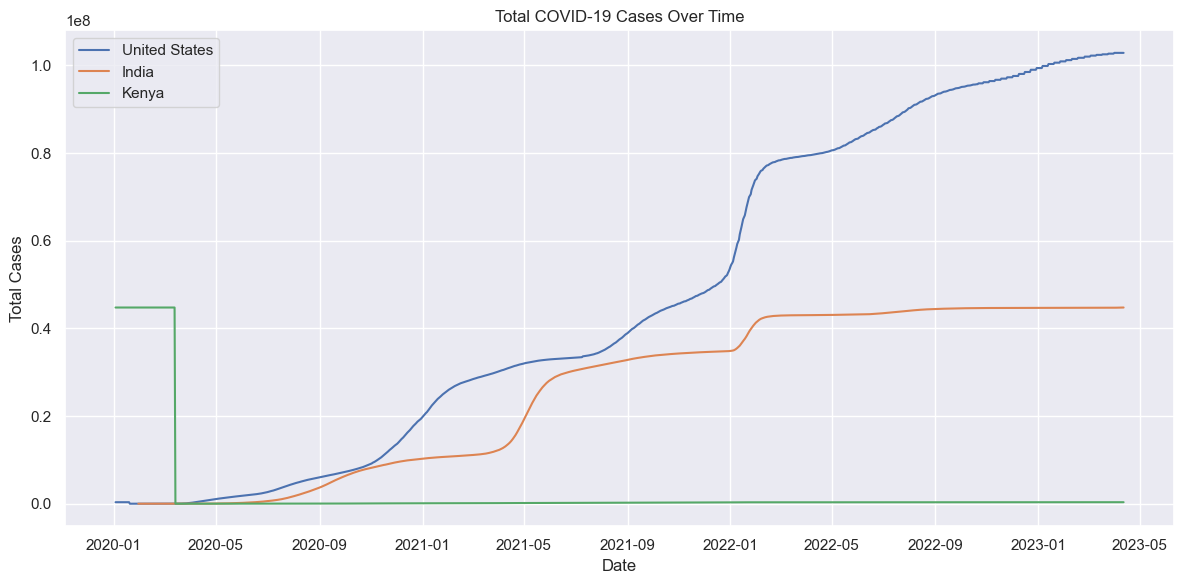

In [7]:
# Plot total cases over time for each country
plt.figure(figsize=(12, 6))

for country in countries:
    subset = df_filtered[df_filtered["location"] == country]
    plt.plot(subset["date"], subset["total_cases"], label=country)

plt.title("Total COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.legend()
plt.tight_layout()
plt.show()

 Plot Total Deaths Over Time

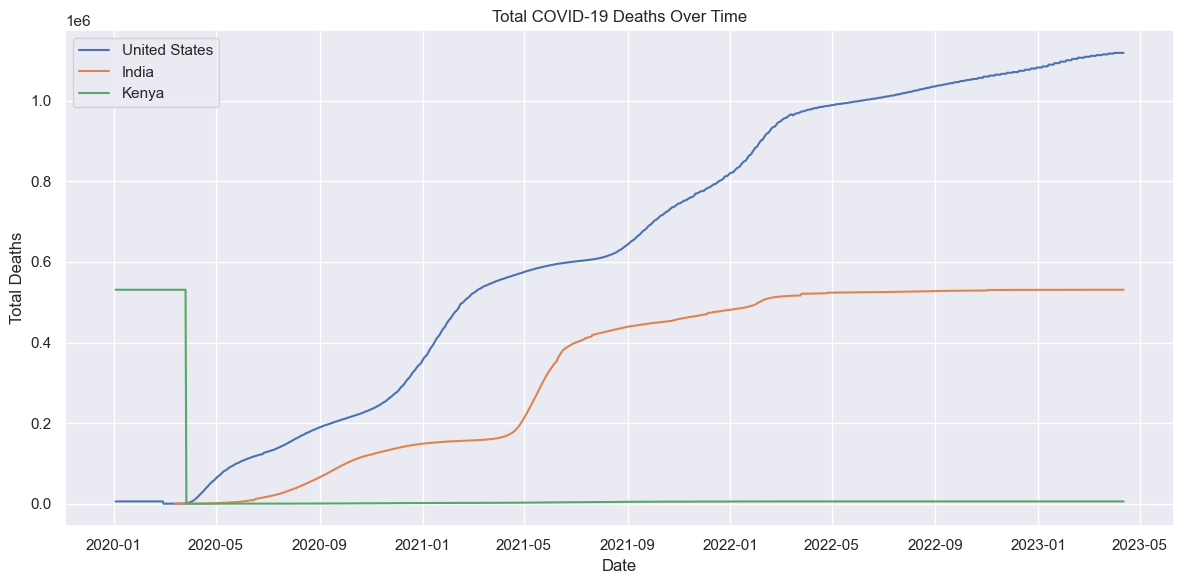

In [8]:
# Plot total deaths over time
plt.figure(figsize=(12, 6))

for country in countries:
    subset = df_filtered[df_filtered["location"] == country]
    plt.plot(subset["date"], subset["total_deaths"], label=country)

plt.title("Total COVID-19 Deaths Over Time")
plt.xlabel("Date")
plt.ylabel("Total Deaths")
plt.legend()
plt.tight_layout()
plt.show()

Plot Daily New Cases

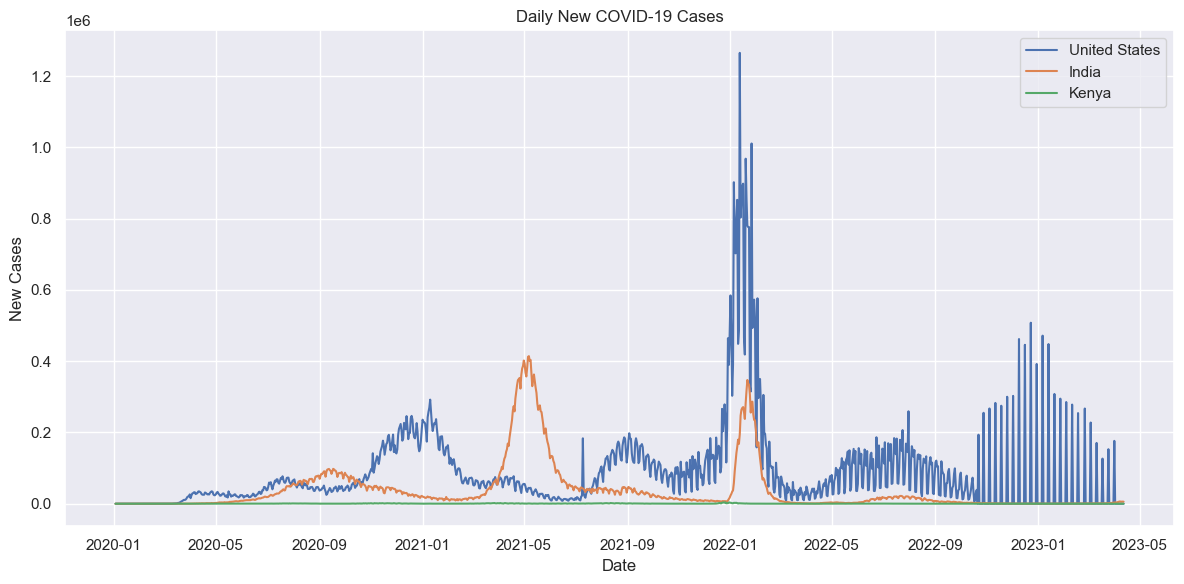

In [9]:
# Plot daily new cases
plt.figure(figsize=(12, 6))

for country in countries:
    subset = df_filtered[df_filtered["location"] == country]
    plt.plot(subset["date"], subset["new_cases"], label=country)

plt.title("Daily New COVID-19 Cases")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.legend()
plt.tight_layout()
plt.show()


Calculate and Plot Death Rate
* The death rate is defined as: death_rate = total_deaths / total_cases

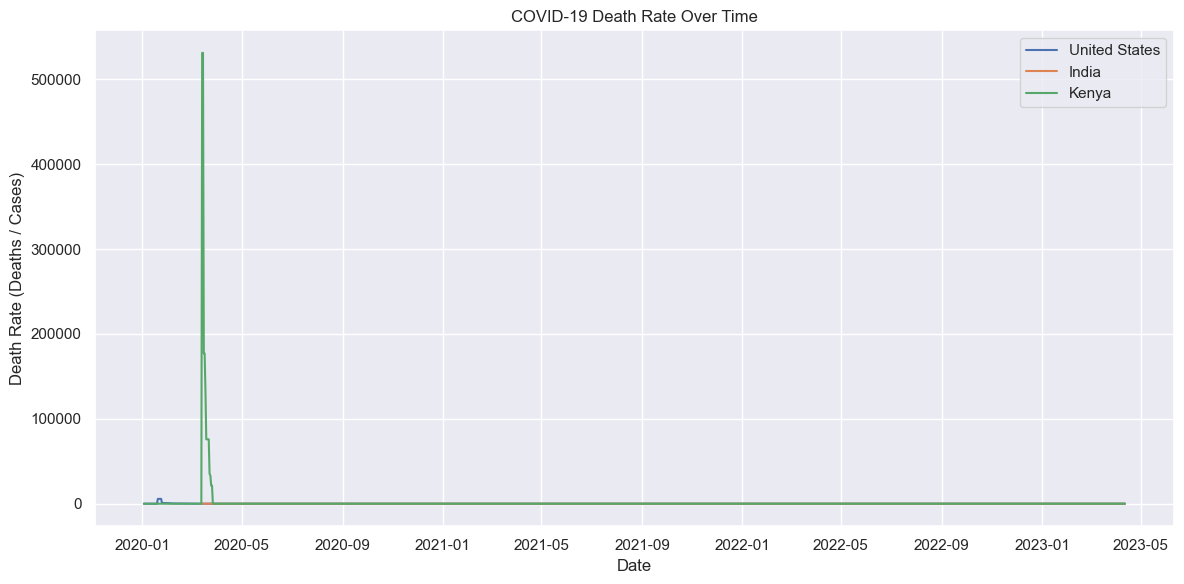

In [10]:
df_filtered["death_rate"] = df_filtered["total_deaths"] / df_filtered["total_cases"]

# Plot death rate over time
plt.figure(figsize=(12, 6))

for country in countries:
    subset = df_filtered[df_filtered["location"] == country]
    plt.plot(subset["date"], subset["death_rate"], label=country)

plt.title("COVID-19 Death Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Death Rate (Deaths / Cases)")
plt.legend()
plt.tight_layout()
plt.show()


 Plot Total Vaccinations Over Time

# Plot total vaccinations over time
plt.figure(figsize=(12, 6))

for country in countries:
    subset = df_filtered[df_filtered["location"] == country]
    plt.plot(subset["date"], subset["total_vaccinations"], label=country)

plt.title("Total COVID-19 Vaccinations Over Time")
plt.xlabel("Date")
plt.ylabel("Total Vaccinations")
plt.legend()
plt.tight_layout()
plt.show()

Plot % of Population Vaccinated

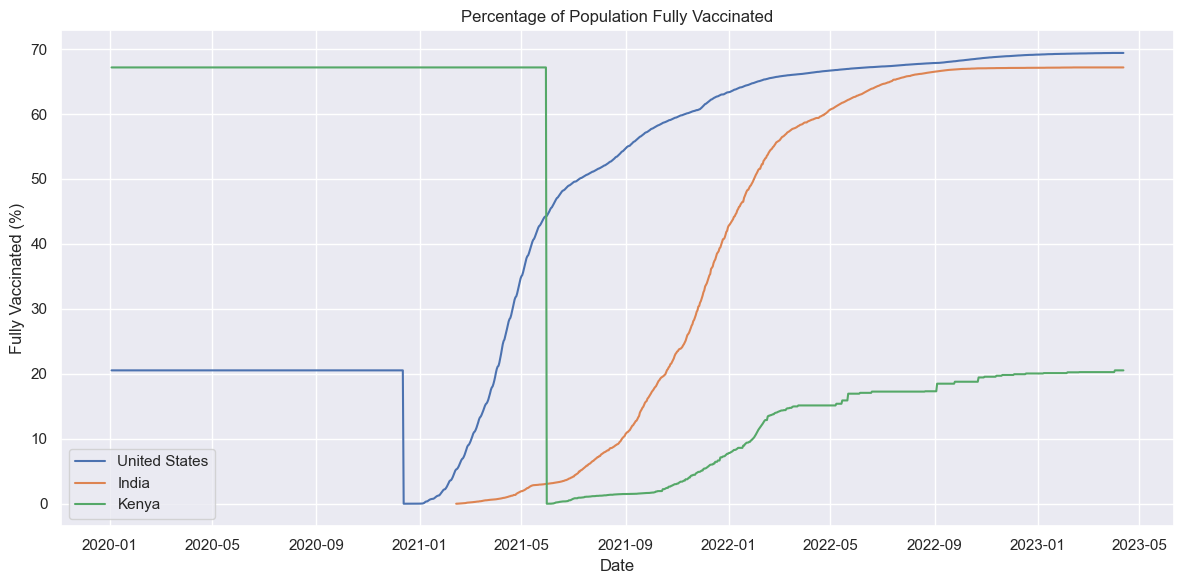

In [11]:
# Plot % of population fully vaccinated over time
plt.figure(figsize=(12, 6))

for country in countries:
    subset = df_filtered[df_filtered["location"] == country]
    plt.plot(subset["date"], subset["people_fully_vaccinated_per_hundred"], label=country)

plt.title("Percentage of Population Fully Vaccinated")
plt.xlabel("Date")
plt.ylabel("Fully Vaccinated (%)")
plt.legend()
plt.tight_layout()
plt.show()

df_filtered["percent_vaccinated"] = (
    df_filtered["total_vaccinations"] / df_filtered["population"] * 100
)
